# Первичный анализ данных

### Для начала импортируем необходимые для анализа библиотеки и датасет:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


studying = pd.read_csv('stud_math.csv')

## Предобработка

In [ ]:
# Для уменьшения кода выпишем функцию count_values, которая считает количество уникальных значений по отдельным столбцам: 

def count_values(column_name): 
    return studying[column_name].value_counts()

# Определим функцию, которая заменяет значения nan на None: 

def none_function(column): 
    studying[column] = studying[column].astype(str).apply(lambda x: None if x.strip() =='' else x)
    return studying[column]




### Посмотрим на данные и информацию о них: 

In [3]:
display(studying)
studying.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### По результатам в колонке Non-Null Count видно, что количество ненулевых значений в разных столбцах отличается, а значит необходимо сначала данные почистить и избавиться от NaN-значений. 
### Также, понятно что в датасете 13 числовых и 17 строковых столбцов

### Проанализируем каждый столбец отдельно:

In [60]:
# Подсчитаем количество уникальных значений школ. По результатам их всего 2 - GP и MS. 
none_function('school')
count_values('school')

GP    349
MS     46
Name: school, dtype: int64

#### Как видим, у нас всего две школы - GP и MS, данные полные

In [61]:
none_function('sex')
count_values('sex')

F    208
M    187
Name: sex, dtype: int64

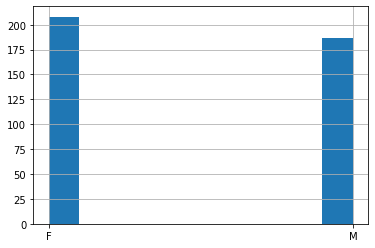

In [8]:
studying['sex'].hist()

#### Количество учащихся девочек и мальчиков почти одинаковое, но девочек немного больше. Данные полные. 

In [62]:
# Посмотрим на распределение возраста учеников
none_function('age')
count_values('age')

16    104
17     98
18     82
15     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

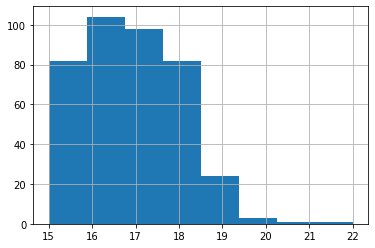

In [39]:
# Как видим по гистограмме, количество учеников старше 19 лет очень мало, что может быть связано с тем, что в таком возрасте 
# многие идут работать, а не учиться. 
studying.age.hist(bins=8)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


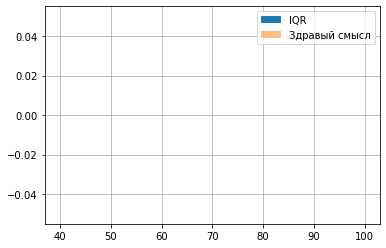

In [41]:
#Посмотрим на выбросы (визуально их нет): 
IQR = studying.age.quantile(0.75) - studying.age.quantile(0.25) #Интерквартильный размах
perc25 = studying.age.quantile(0.25)
perc75 = studying.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
studying.age.loc[studying.age.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
studying.age.loc[studying.age <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

In [63]:
none_function('address')
count_values('address') #Как видим, присутствуют значения, которые мы не сможем заполнить. 

U      295
R       83
nan     17
Name: address, dtype: int64

#### Как видим, выбросов нет

In [64]:
none_function('famsize')
count_values('famsize')
# В результате видим 27 пустых значений в размере семьи

GT3    261
LE3    107
nan     27
Name: famsize, dtype: int64

In [65]:
none_function('Pstatus')
count_values('Pstatus')

T      314
nan     45
A       36
Name: Pstatus, dtype: int64

In [66]:
none_function('Medu')
count_values('Medu')

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
nan      3
Name: Medu, dtype: int64

In [67]:
none_function('Fedu')
count_values('Fedu')

2.0     106
3.0      96
4.0      88
1.0      78
nan      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [68]:
none_function('Mjob')
count_values('Mjob')

other       133
services     98
at_home      58
teacher      55
health       32
nan          19
Name: Mjob, dtype: int64

In [69]:
none_function('Fjob')
count_values('Fjob')

other       197
services    102
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [70]:
none_function('reason')
count_values('reason')

course        137
home          104
reputation    103
other          34
nan            17
Name: reason, dtype: int64

In [71]:
none_function('guardian')
count_values('guardian')

mother    250
father     86
nan        31
other      28
Name: guardian, dtype: int64

In [72]:
none_function('traveltime')
count_values('traveltime')

1.0    242
2.0     96
nan     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [73]:
none_function('studytime')
count_values('studytime')

2.0    194
1.0    103
3.0     64
4.0     27
nan      7
Name: studytime, dtype: int64

In [74]:
none_function('failures')
count_values('failures')

0.0    293
1.0     49
nan     22
2.0     16
3.0     15
Name: failures, dtype: int64

In [75]:
none_function('schoolsup')
count_values('schoolsup')

no     335
yes     51
nan      9
Name: schoolsup, dtype: int64

In [76]:
none_function('famsup')
count_values('famsup')

yes    219
no     137
nan     39
Name: famsup, dtype: int64

In [77]:
none_function('paid')
count_values('paid')

no     200
yes    155
nan     40
Name: paid, dtype: int64

In [78]:
none_function('activities')
count_values('activities')

yes    195
no     186
nan     14
Name: activities, dtype: int64

In [79]:
none_function('nursery')
count_values('nursery')

yes    300
no      79
nan     16
Name: nursery, dtype: int64

In [81]:
none_function('studytime, granular')
count_values('studytime, granular')

-6.0     194
-3.0     103
-9.0      64
-12.0     27
nan        7
Name: studytime, granular, dtype: int64

In [82]:
none_function('higher')
count_values('higher')

yes    356
nan     20
no      19
Name: higher, dtype: int64

In [83]:
none_function('internet')
count_values('internet')

yes    305
no      56
nan     34
Name: internet, dtype: int64

In [84]:
none_function('romantic')
count_values('romantic')

no     240
yes    124
nan     31
Name: romantic, dtype: int64

In [85]:
none_function('famrel')
count_values('famrel')

4.0     182
5.0      99
3.0      62
nan      27
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64

In [86]:
none_function('freetime')
count_values('freetime')

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
nan     11
Name: freetime, dtype: int64

In [87]:
none_function('goout')
count_values('goout')

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
nan      8
Name: goout, dtype: int64

In [88]:
none_function('health')
count_values('health')

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
nan     15
Name: health, dtype: int64

In [89]:
none_function('absences')
count_values('absences')

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
nan       12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
1.0        3
9.0        3
15.0       2
11.0       2
13.0       2
23.0       1
30.0       1
26.0       1
25.0       1
56.0       1
38.0       1
21.0       1
385.0      1
75.0       1
24.0       1
54.0       1
40.0       1
28.0       1
17.0       1
212.0      1
19.0       1
Name: absences, dtype: int64

In [90]:
none_function('score')
count_values('score')

50.0     54
55.0     46
0.0      37
75.0     33
60.0     31
40.0     31
65.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
nan       6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64